In [1073]:
import pandas as pd 
import matplotlib.pyplot as plt 
pd.options.display.float_format = '{:,.4f}'.format
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np 

# Carga

In [1074]:
vixCasa = pd.read_csv(r'C:\Users\arthu\OneDrive\Projetos\0-GitHub\mlStuff\Projects\OlxHousePricePrediction\Extraction\data\vixCasas.csv' , encoding='utf-16', sep='|')

In [1075]:
vixApp = pd.read_csv(r'C:\Users\arthu\OneDrive\Projetos\0-GitHub\mlStuff\Projects\OlxHousePricePrediction\Extraction\data\vixApartamentos.csv' , encoding='utf-16', sep='|')

In [1076]:
df = pd.concat([vixCasa, vixApp], ignore_index=True)

In [1077]:
df = df.drop_duplicates(subset=(['Codigo']))

# Tratamento de dados

### Alterando tipo de dados

In [1078]:
df['Valor']= df['Valor'].map(lambda x : str(x).replace('R$ ','').replace('.','')).astype(float)

In [1079]:
df['Área útil'] =  df['Área útil'].map(lambda x : str(x).replace('m²' ,'')).astype(float)
df['Área construída'] = df['Área construída'].map(lambda x : str(x).replace('m²' ,'')).astype(float)
df['Area'] = df['Área útil'].fillna(df['Área construída'])

In [1080]:
df['Quartos'] = df['Quartos'].map(lambda x : 5 if x=='5 ou mais' else int(x))
df['Banheiros'] = df['Banheiros'].fillna(0).map(lambda x : 5 if x=='5 ou mais' else int(x))
df['Vagas na garagem'] = df['Vagas na garagem'].fillna(0).map(lambda x : 5 if x=='5 ou mais' else int(x))

In [1081]:
df.drop(['Link','Descricao','Área útil' , 'Área construída', 'Page' ,'Detalhes do imóvel', 'Condomínio', 'IPTU',
       'Detalhes do condominio', 'Logradouro','CEP', 'Município', 'Codigo','Tipo'] , axis=1, inplace=True)

In [1082]:
df = df[df['Banheiros'] >0]
df = df[df['Quartos'] >0]

### Análise e remoção de outliers

In [1083]:
def fncCalculaLimites(x):
    return x.quantile(0.75) + x.std()*1.5 , x.quantile(0.25) - x.std()*1.5 

##### Valor

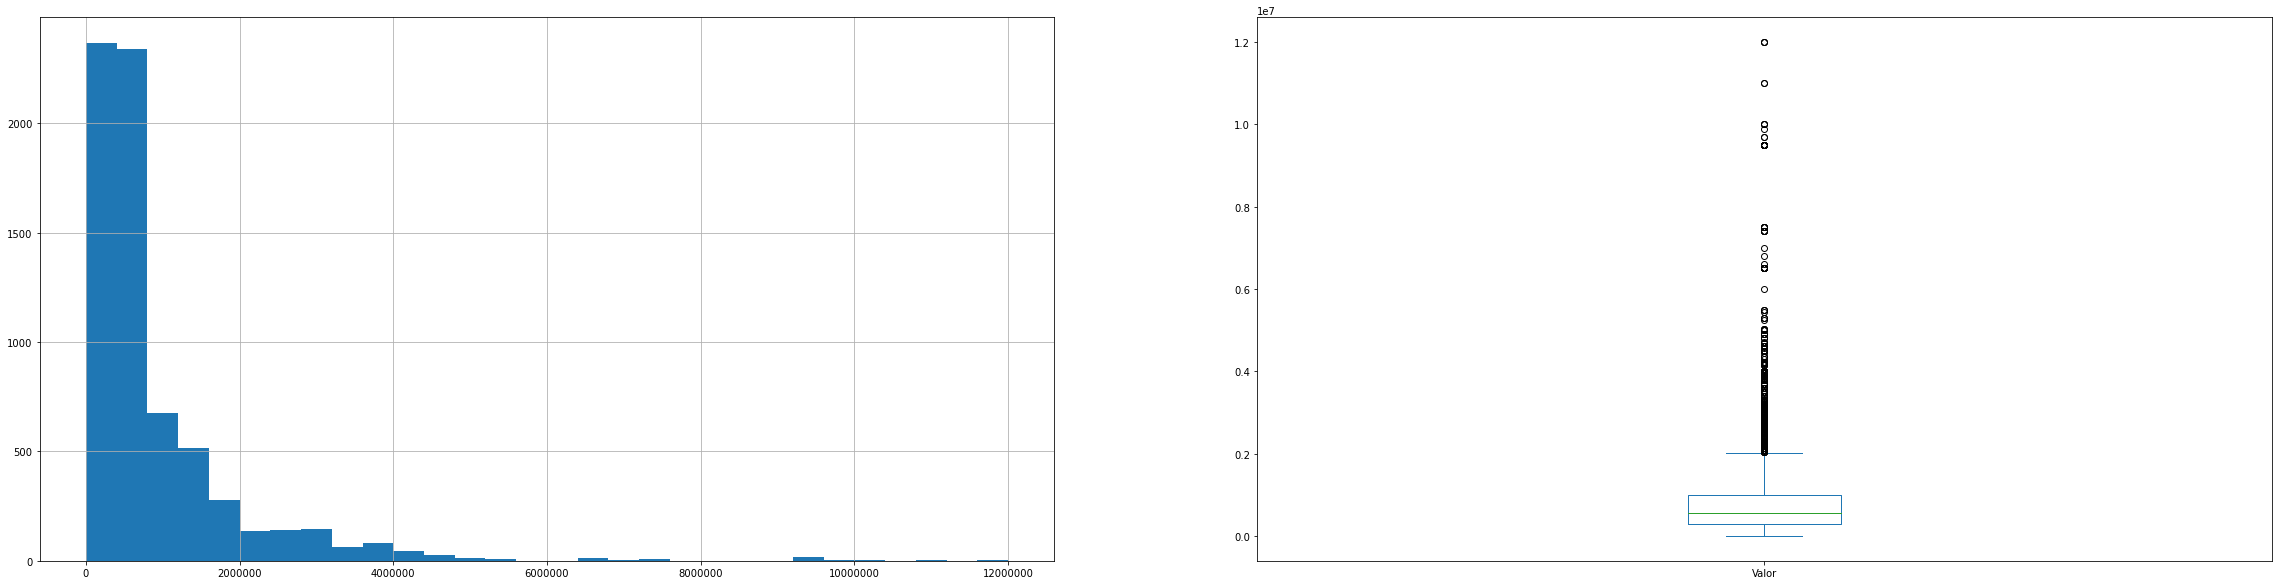

In [1084]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Valor'].hist(bins= 30)

plt.subplot(1,2,2)
df['Valor'].plot(kind = 'box')
plt.show()

In [1085]:
fncCalculaLimites(np.log2(df[df['Valor']>0]['Valor']))

(22.73632578144708, 15.375346193339947)

<AxesSubplot:>

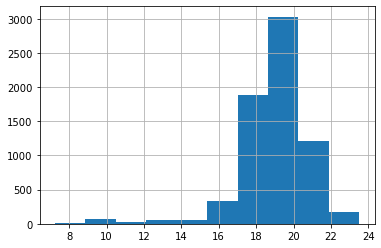

In [1086]:
np.log2(df[df['Valor']>0]['Valor']).hist()

In [1087]:
df[df['Valor']<=42000]

,Valor,Categoria,Quartos,Banheiros,Vagas na garagem,Bairro,Area
33,"20,000.0000",Casas,2,2,1,Goiabeiras,200.0000
92,"9,000.0000",Casas,5,5,1,Praia do Canto,194.0000
124,"25,000.0000",Casas,3,2,0,Santa Cecília,NaN
130,0.0000,Casas,2,2,2,Centro,NaN
218,"5,000.0000",Casas,2,2,0,São Pedro,NaN
...,...,...,...,...,...,...,...
6823,"1,250.0000",Apartamentos,1,1,0,Centro,80.0000
6950,800.0000,Apartamentos,4,3,2,Jardim Camburi,NaN
7080,0.0000,Apartamentos,3,2,2,Santa Lúcia,0.0000
7101,0.0000,Apartamentos,2,1,1,Centro,0.0000


In [1088]:
df = df[(df['Valor']>42000) & (df['Valor']<=7000000)]

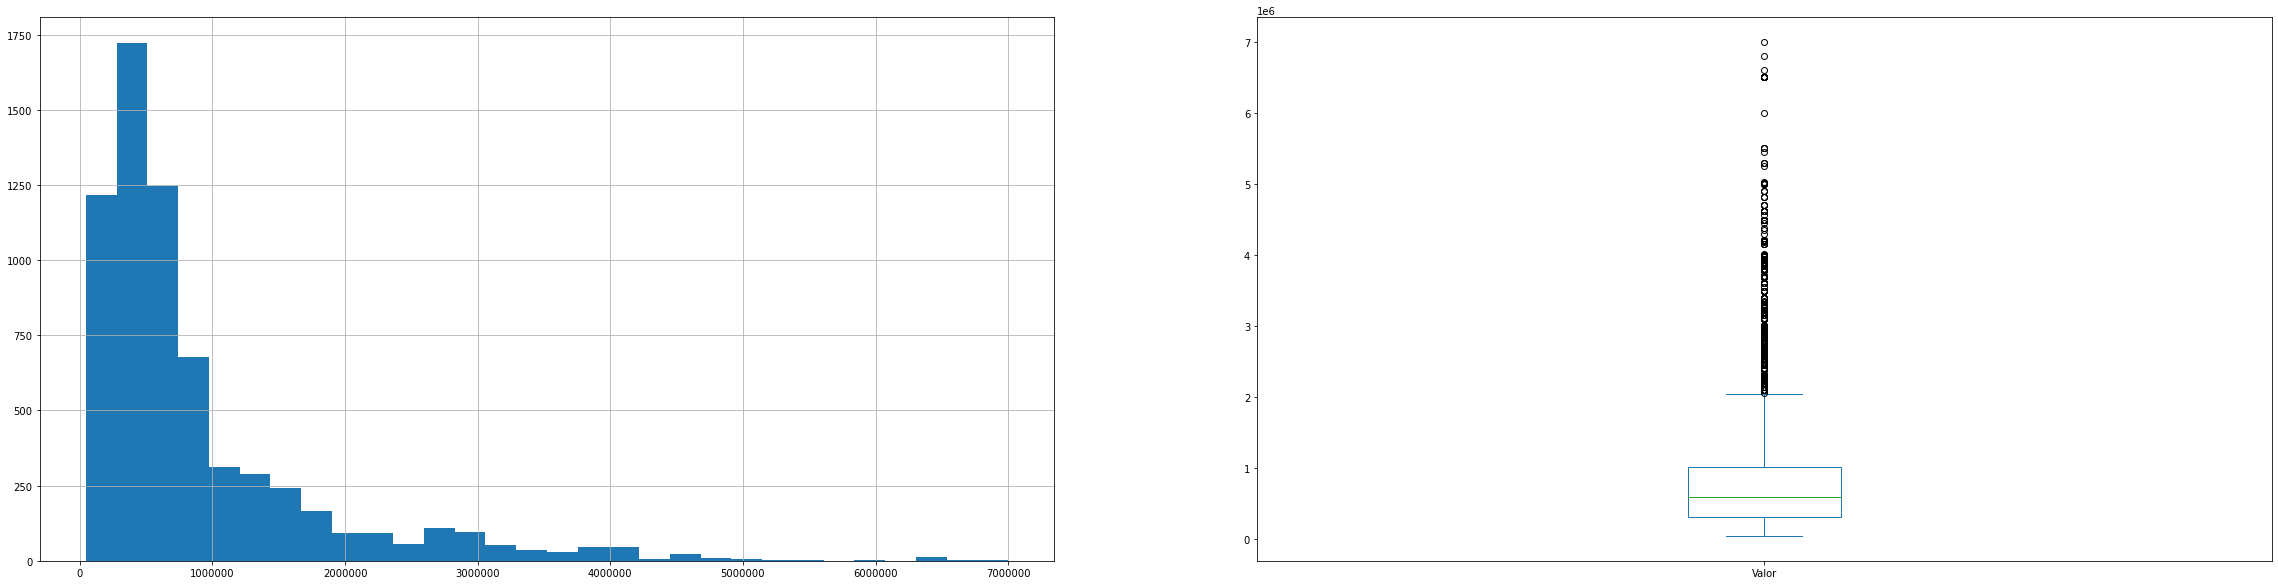

In [1089]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Valor'].hist(bins= 30)

plt.subplot(1,2,2)
df['Valor'].plot(kind = 'box')
plt.show()

##### Area

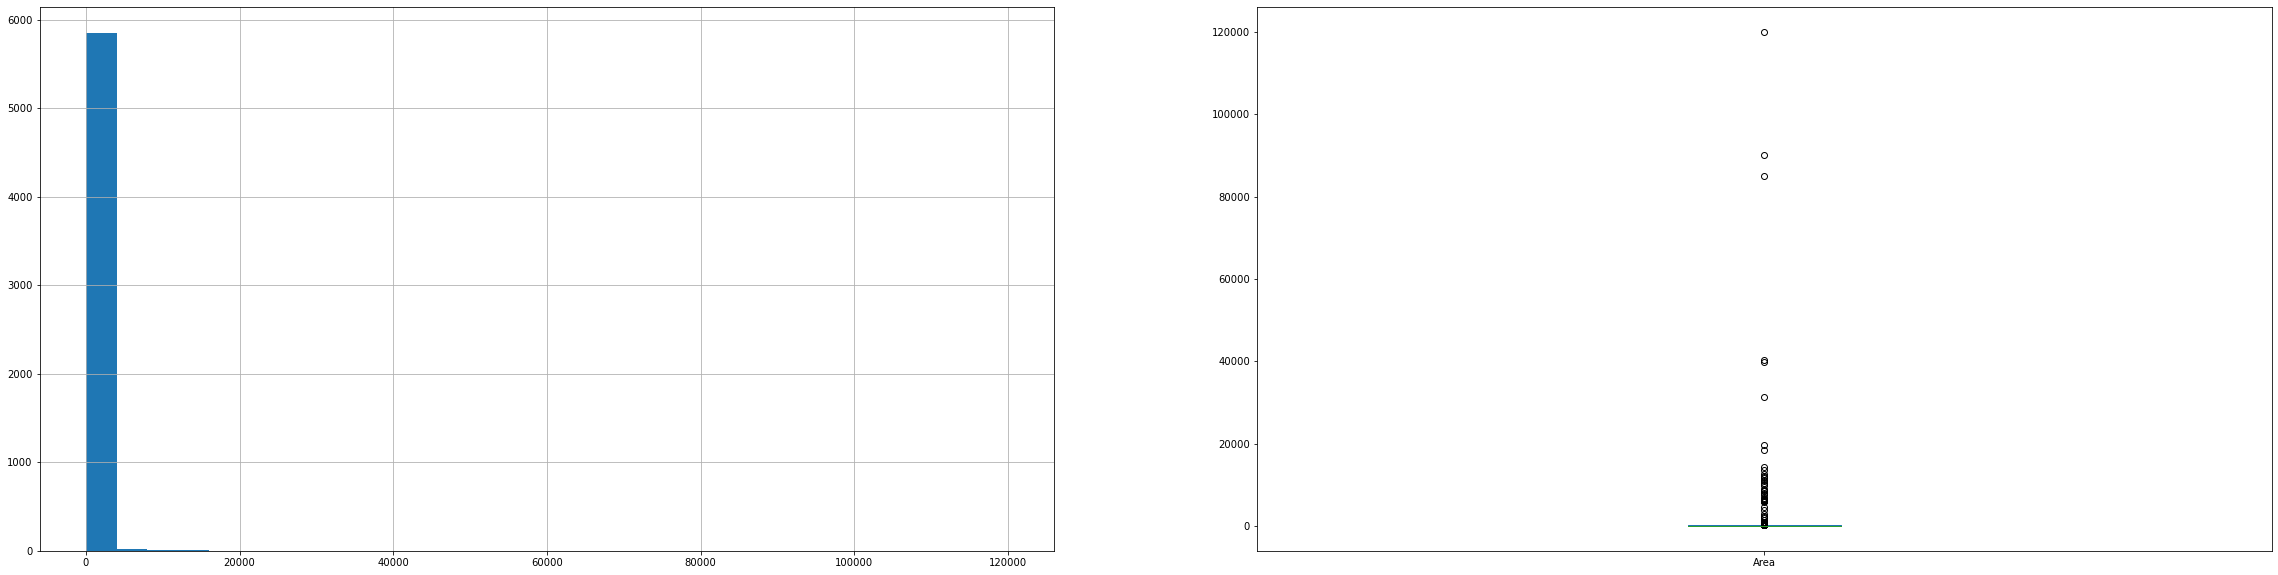

In [1090]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Area'].hist(bins= 30)

plt.subplot(1,2,2)
df['Area'].plot(kind = 'box')
plt.show()

In [1091]:
# Temos 341 itens com area 0 e podemos considerar erros de preenchimento
df[df['Area']==0]

,Valor,Categoria,Quartos,Banheiros,Vagas na garagem,Bairro,Area
1,"400,000.0000",Casas,3,2,2,Goiabeiras,0.0000
20,"265,000.0000",Casas,2,2,1,Jucutuquara,0.0000
39,"250,000.0000",Casas,3,2,2,Gurigica,0.0000
52,"190,000.0000",Casas,3,4,2,Jucutuquara,0.0000
76,"270,000.0000",Casas,3,2,1,Goiabeiras,0.0000
...,...,...,...,...,...,...,...
7296,"782,000.0000",Apartamentos,3,3,2,Santa Luíza,0.0000
7342,"779,004.0000",Apartamentos,3,2,2,Barro Vermelho,0.0000
7344,"780,010.0000",Apartamentos,3,3,2,Santa Luíza,0.0000
7375,"780,000.0000",Apartamentos,3,3,2,Santa Luíza,0.0000


In [1092]:
# Removendo valores com erro de preenchimento
df= df[df['Area']>0]

In [1093]:
max , min = fncCalculaLimites(df['Area'])
df = df[(df['Area'] > min) & (df['Area'] < max)]

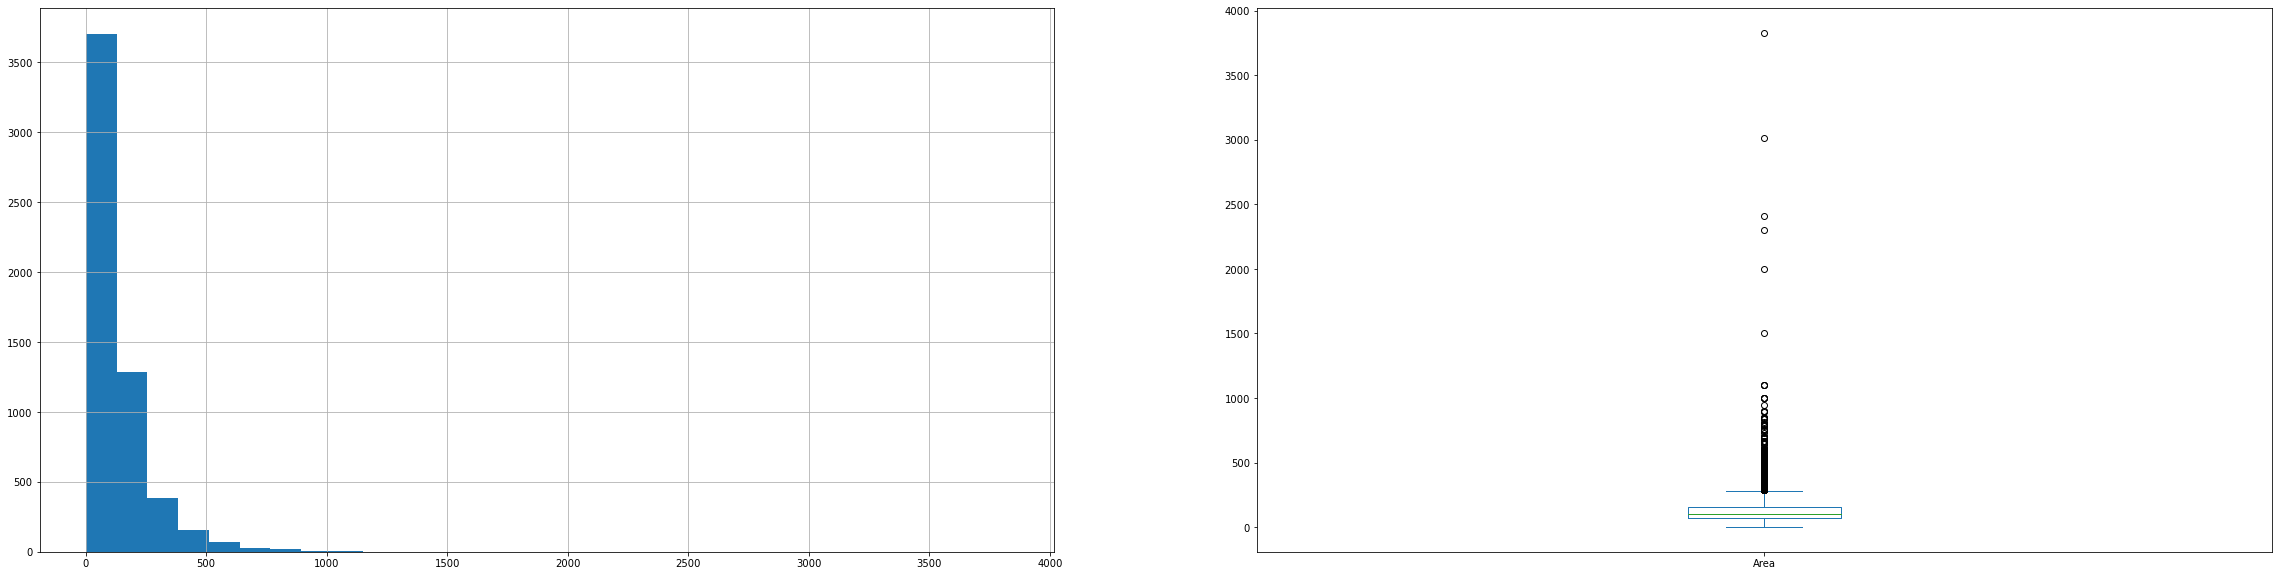

In [1094]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Area'].hist(bins= 30)

plt.subplot(1,2,2)
df['Area'].plot(kind = 'box')
plt.show()

### Campos descritivos

##### Bairros

In [1095]:
df['Bairro'].value_counts()

Jardim Camburi       1780
Jardim da Penha       636
Praia do Canto        541
Mata da Praia         413
Bento Ferreira        356
                     ... 
Jesus de Nazareth       1
Andorinhas              1
Segurança do Lar        1
Parque Industrial       1
Nazareth                1
Name: Bairro, Length: 72, dtype: int64

In [1096]:
regioes ={
 'Itararé':  'Maruípe' ,
 'Santa Lúcia':  'Zona Leste' ,
 'Jardim Camburi': 'Jardim Camburi'  ,
 'Goiabeiras':  'Zona Norte' ,
 'Santa Helena':  'Zona Leste' ,
 'Ilha do Boi':   'Zona Leste',
 'Jucutuquara':  'Jucutuquara' ,
 'Praia do Canto': 'Zona Leste'  ,
 'Centro':  'Zona Sul' ,
 'Fradinhos':  'Jucutuquara' ,
 'Mata da Praia': 'Jardim da Penha'  ,
 "Joana D'arc":  'Maruípe' ,
 'Bento Ferreira':  'Jucutuquara' ,
 'de Lourdes':  'Jucutuquara' ,
 'República':  'Jardim da Penha' ,
 'Santa Cecília': 'Maruípe'  ,
 'Morada de Camburi': 'Jardim da Penha'  ,
 'Maruípe': 'Maruípe'  ,
 'Tabuazeiro': 'Maruípe'  ,
 'Maria Ortiz':  'Zona Norte' ,
 'Santo Antônio':  'Santo Antônio' ,
 'Santa Martha':  'Maruípe' ,
 'São Cristóvão':   'Maruípe',
 'Santos Reis': 'Zona Oeste'  ,
 'Enseada do Suá': 'Zona Leste'  ,
 'Santos Dumont':  'Maruípe' ,
 'Jardim da Penha':  'Jardim da Penha' ,
 'Universitário':  'Santo Antônio' ,
 'Solon Borges': 'Zona Norte'  ,
 'Santa Tereza':  'Santo Antônio' ,
 'Ilha do Frade':  'Zona Leste' ,
 'da Penha':  'Maruípe' ,
 'Horto': 'Jucutuquara'  ,
 'Santa Clara':   'Zona Sul',
 'São Pedro':  'Zona Oeste' ,
 'Parque Moscoso':  'Zona Sul'  ,
 'Consolação':  'Jucutuquara' ,
 'São Benedito':  'Maruípe' ,
 'Caratoíra': 'Santo Antônio'  ,
 'Grande Vitória':  'Santo Antônio' ,
 'Jesus de Nazareth': 'Jucutuquara'  ,
 'Romão': 'Jucutuquara'  ,
 'Bonfim':  'Maruípe' ,
 'Praia do Suá': 'Zona Leste'  ,
 'Mário Cypreste': 'Santo Antônio'  ,
 'Jabour': 'Zona Norte'  ,
 'Santa Luíza':  'Zona Leste' ,
 'São José': 'Zona Oeste'  ,
 'Pontal de Camburi': 'Jardim da Penha'  ,
 'Andorinhas':  'Maruípe' ,
 'Nova Palestina':  'Zona Oeste' ,
 'Boa Vista': 'Jardim da Penha'  ,
 'Redenção': 'Zona Oeste'  ,
 'Antônio Honório':  'Zona Norte' ,
 'Monte Belo':  'Jucutuquara' ,
 'Barro Vermelho':  'Zona Leste' ,
 'Resistência': 'Zona Oeste'  ,
 'Bela Vista':  	'Santo Antônio'  ,
 'Santo André':  'Zona Oeste' ,
 'Ilha do Príncipe':  'Zona Sul'  ,
 'Ilha de Santa Maria': 'Jucutuquara'  ,
 'Fonte Grande':  'Zona Sul' ,
 'Estrelinha':  'Santo Antônio' ,
 'Inhanguetá':  'Santo Antônio' ,
 'Vila Rubim':  'Zona Sul' ,
 'Cruzamento':  'Jucutuquara' ,
 'Ilha das Caieiras': 'Zona Oeste'  ,
 'do Moscoso': 'Zona Sul'  ,
 'Forte São João':  'Jucutuquara' ,
 'Segurança do Lar':  'Zona Norte' ,
 'Piedade' : 'Zona Sul',
 'Parque Industrial': 'Jardim Camburi'  ,
 'Nazareth' :'Jucutuquara'
}

In [1097]:
df['Regiao'] = df['Bairro'].map(regioes)

In [1098]:
df['Regiao'].value_counts()

Jardim Camburi     1781
Zona Leste         1482
Jardim da Penha    1147
Jucutuquara         509
Zona Sul            298
Maruípe             248
Zona Norte           99
Santo Antônio        56
Zona Oeste           47
Name: Regiao, dtype: int64

In [1099]:
df 

,Valor,Categoria,Quartos,Banheiros,Vagas na garagem,Bairro,Area,Regiao
0,"150,000.0000",Casas,3,2,1,Itararé,110.0000,Maruípe
2,"150,000.0000",Casas,2,2,2,Itararé,125.0000,Maruípe
3,"550,000.0000",Casas,2,1,1,Santa Lúcia,100.0000,Zona Leste
4,"1,400,000.0000",Casas,4,2,2,Jardim Camburi,180.0000,Jardim Camburi
5,"400,000.0000",Casas,2,1,0,Goiabeiras,140.0000,Zona Norte
...,...,...,...,...,...,...,...,...
7395,"770,000.0000",Apartamentos,3,1,2,Jardim Camburi,90.0000,Jardim Camburi
7396,"779,000.0000",Apartamentos,3,3,2,Santa Luíza,87.0000,Zona Leste
7397,"480,000.0000",Apartamentos,2,2,2,Jardim Camburi,68.0000,Jardim Camburi
7398,"459,500.0000",Apartamentos,2,2,1,Jardim Camburi,65.0000,Jardim Camburi


In [1100]:
df.corr()

,Valor,Quartos,Banheiros,Vagas na garagem,Area
Valor,1.0000,0.6084,0.6754,0.6702,0.5805
Quartos,0.6084,1.0000,0.6690,0.5475,0.5334
Banheiros,0.6754,0.6690,1.0000,0.5533,0.5009
Vagas na garagem,0.6702,0.5475,0.5533,1.0000,0.4812
Area,0.5805,0.5334,0.5009,0.4812,1.0000


# Modelagem

### Pre Processamento

In [1101]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [1102]:
x_train, x_test, y_train ,y_test = train_test_split(df.drop('Valor', axis=1), df['Valor'], test_size= 0.2)

#### Dummy categories

In [1103]:
encoderCategoria = OneHotEncoder()

In [1104]:
categories = encoderCategoria.fit_transform(x_train[['Categoria']])

In [1105]:
categories = pd.DataFrame(categories.toarray(), columns = encoderCategoria.get_feature_names_out(), index = x_train.index)

In [1106]:
x_train = x_train.join(categories).drop('Categoria', axis= 1)

In [1107]:
encoderRegiao = OneHotEncoder()

In [1108]:
regiao = encoderRegiao.fit_transform(x_train[['Regiao']])

In [1109]:
regiao = pd.DataFrame(regiao.toarray(), columns= encoderRegiao.get_feature_names_out(), index= x_train.index)

In [1110]:
x_train = x_train.join(regiao).drop('Regiao', axis = 1)

#### Normalizacao

In [1111]:
from sklearn.preprocessing import StandardScaler

In [1112]:
norm = StandardScaler()

In [1113]:
x_train['Area'] = norm.fit_transform(x_train[['Area']])

### Modelo

<AxesSubplot:>

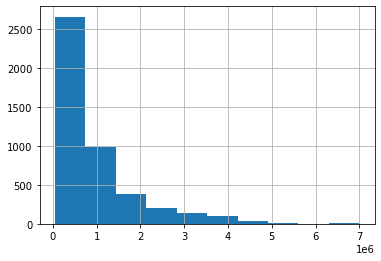

In [1114]:
y_train.hist()

In [1115]:
y_train = np.log2(y_train)

<AxesSubplot:>

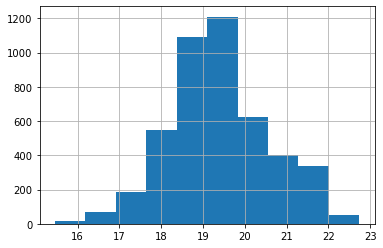

In [1116]:
y_train.hist()

In [1117]:
x_train = x_train.select_dtypes(include = np.number)

In [1118]:
from sklearn.linear_model import LinearRegression

In [1119]:
regressao = LinearRegression()

In [1120]:
regressao.fit(x_train, y_train)

LinearRegression()

In [1121]:
regressao.score(x_train, y_train)

0.7490369060839368

In [1122]:
x_train

,Quartos,Banheiros,Vagas na garagem,Area,Categoria_Apartamentos,Categoria_Casas,Regiao_Jardim Camburi,Regiao_Jardim da Penha,Regiao_Jucutuquara,Regiao_Maruípe,Regiao_Santo Antônio,Regiao_Zona Leste,Regiao_Zona Norte,Regiao_Zona Oeste,Regiao_Zona Sul
4933,4,4,3,0.4785,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
3580,3,2,2,-0.3289,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4217,2,1,1,-0.5358,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5638,3,1,2,-0.3956,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5658,3,2,2,-0.3289,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5222,4,4,3,0.9323,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4316,2,2,2,-0.5558,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
2997,3,3,1,-0.1154,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
6669,4,2,1,-0.1154,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000


<AxesSubplot:xlabel='Valor', ylabel='Quartos'>

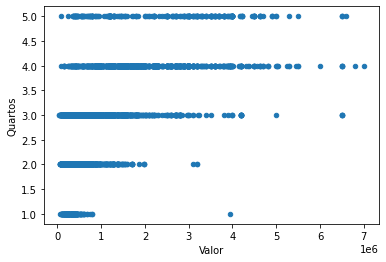

In [1123]:
df.plot(kind = 'scatter' , x='Valor' , y='Quartos')

In [1124]:
df.groupby('Quartos').mean()

,Valor,Banheiros,Vagas na garagem,Area
Quartos,,,,
1,"336,226.2557",1.0625,0.9261,67.1477
2,"484,059.0796",1.6377,1.1555,80.0145
3,"775,296.7878",2.2634,1.6461,125.7790
4,"1,952,630.5225",3.5983,2.6320,238.7528
5,"2,500,766.4023",4.2632,2.9737,430.1579


#### Validação

In [1125]:
categories = encoderCategoria.transform(x_test[['Categoria']])

In [1126]:
categories = pd.DataFrame(categories.toarray(), columns= encoderCategoria.get_feature_names_out(), index = x_test.index)

In [1127]:
x_test = x_test.join(categories).drop('Categoria', axis = 1)

In [1128]:
regioes = pd.DataFrame(encoderRegiao.transform(x_test[['Regiao']]).toarray() , columns = encoderRegiao.get_feature_names_out(), index =x_test.index)

In [1129]:
x_test = x_test.join(regioes).drop('Regiao', axis =1)

In [1130]:
x_test['Area'] = norm.transform(x_test[['Area']])

In [1131]:
x_test = x_test.select_dtypes(include = np.number)
y_test = np.log2(y_test)

In [1132]:
regressao.score(x_test, y_test)

0.7395506877855595

In [1133]:
from sklearn.model_selection import cross_val_score

In [1134]:
testes = cross_val_score(regressao , x_train, y_train, cv = 100)

In [1135]:
testes.mean()

0.7356428725645112

In [1136]:
pd.Series(regressao.coef_  , index = x_train.columns).sort_values(ascending= False)

Regiao_Zona Leste         0.9895
Regiao_Jardim da Penha    0.7700
Regiao_Jardim Camburi     0.5669
Vagas na garagem          0.3367
Quartos                   0.3324
Regiao_Jucutuquara        0.3237
Banheiros                 0.2311
Area                      0.1309
Categoria_Apartamentos    0.0922
Categoria_Casas          -0.0922
Regiao_Zona Norte        -0.2170
Regiao_Zona Sul          -0.3051
Regiao_Maruípe           -0.3512
Regiao_Santo Antônio     -0.3833
Regiao_Zona Oeste        -1.3935
dtype: float64

In [1137]:
y_predict = regressao.predict(x_test)

In [1138]:
from sklearn.metrics import median_absolute_error, mean_squared_error, r2_score

In [1139]:
r2_score(y_test, y_predict)

0.7395506877855595

In [1140]:
y_test

6753   18.6096
5333   18.6844
2347   22.0000
307    16.0951
22     18.9316
         ...  
6446   18.2718
641    18.6096
3029   19.6937
18     19.6971
4764   20.6540
Name: Valor, Length: 1134, dtype: float64

In [1141]:
y_predict2 = 2**y_predict

In [1142]:
y_test2 = 2**y_test

In [1143]:
r2_score(y_test2, y_predict2)

0.6851936806997775

In [1144]:
x_test

,Quartos,Banheiros,Vagas na garagem,Area,Categoria_Apartamentos,Categoria_Casas,Regiao_Jardim Camburi,Regiao_Jardim da Penha,Regiao_Jucutuquara,Regiao_Maruípe,Regiao_Santo Antônio,Regiao_Zona Leste,Regiao_Zona Norte,Regiao_Zona Oeste,Regiao_Zona Sul
6753,2,1,1,-0.5825,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5333,2,2,1,-0.6092,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2347,4,4,3,1.3526,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
307,4,1,0,-0.9762,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
22,3,1,2,0.0848,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6446,2,1,1,-0.5891,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
641,4,1,1,0.1315,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3029,3,2,2,-0.3756,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
18,4,2,3,0.8522,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [1145]:
y_test2.mean()

992457.7848324515

In [1146]:
y_predict2.mean()

916124.2562297885

(array([  3.,  11.,  87., 383., 518., 113.,  14.,   3.,   1.,   1.]),
 array([-2.81843397, -2.14000016, -1.46156636, -0.78313255, -0.10469875,
         0.57373505,  1.25216886,  1.93060266,  2.60903647,  3.28747027,
         3.96590407]),
 <BarContainer object of 10 artists>)

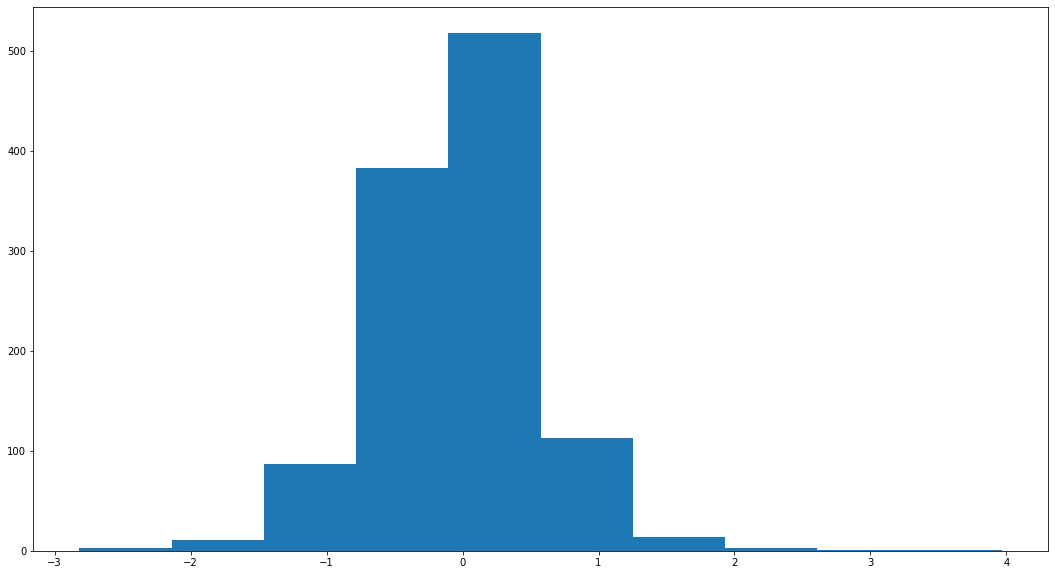

In [1147]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
plt.hist([y_predict - y_test])

In [1148]:
median_absolute_error(y_test2, y_predict2)

141028.68280064172

In [1149]:
median_absolute_error(y_test, y_predict)

0.3335412594094631

(array([ 12.,  55.,  93., 306., 282., 165., 119.,  64.,  31.,   7.]),
 array([16.59617314, 17.21642515, 17.83667716, 18.45692916, 19.07718117,
        19.69743318, 20.31768519, 20.93793719, 21.5581892 , 22.17844121,
        22.79869321]),
 <BarContainer object of 10 artists>)

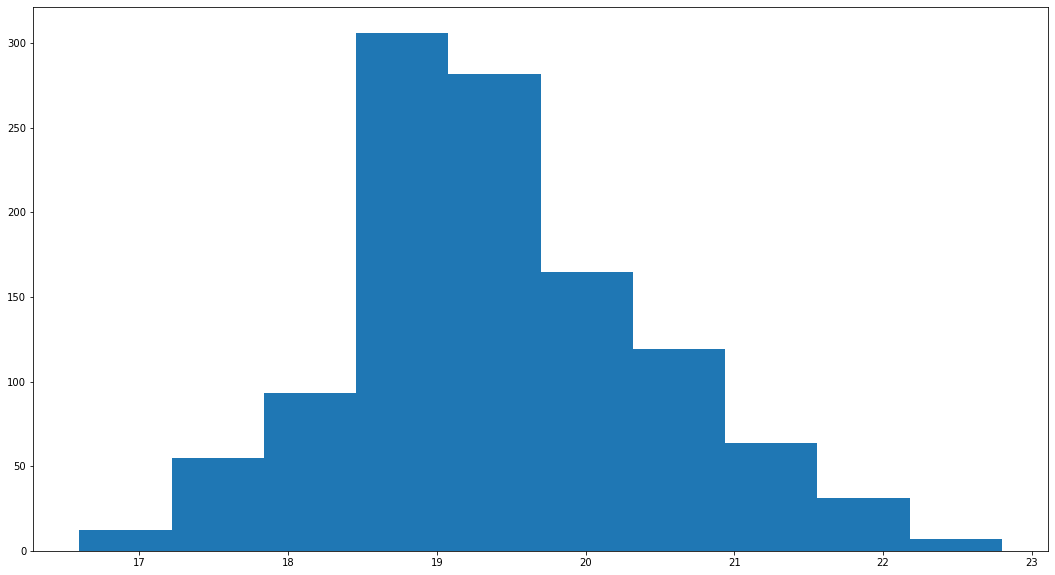

In [1150]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
plt.hist(y_predict)

(array([  7.,  26.,  48., 163., 276., 287., 145.,  84.,  77.,  21.]),
 array([15.87267488, 16.55081085, 17.22894682, 17.90708279, 18.58521877,
        19.26335474, 19.94149071, 20.61962668, 21.29776265, 21.97589862,
        22.65403459]),
 <BarContainer object of 10 artists>)

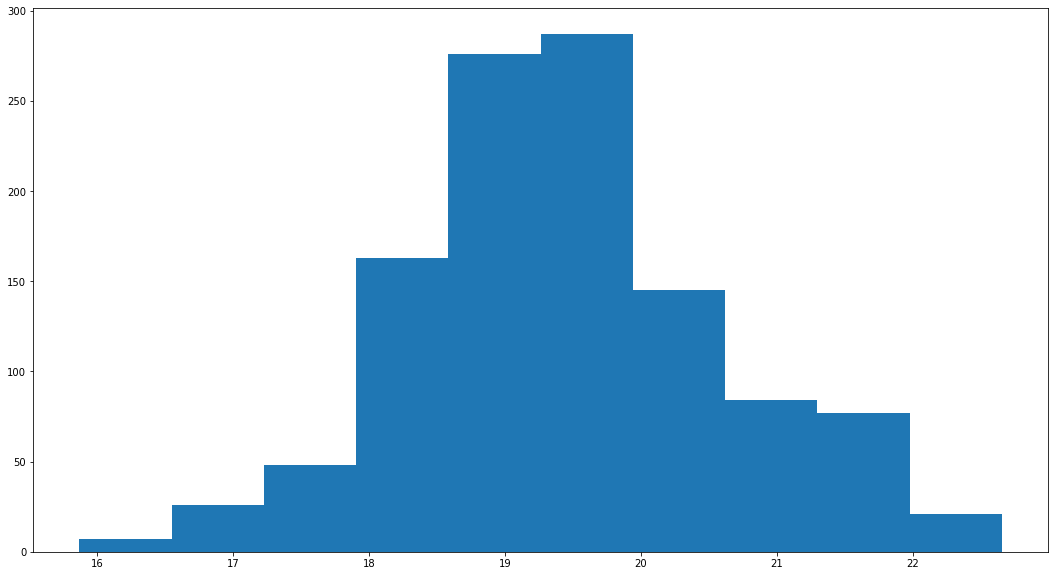

In [1151]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
plt.hist(y_test)